In [1]:
import string
import math
import numpy as np
from matplotlib import pyplot as plt

import nltk, collections
from nltk import word_tokenize, sent_tokenize, bigrams
from nltk.util import ngrams

from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [2]:
#  NLTK Downloader to obtain the resource:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Annie2016\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 1: Structuring the data

#### Loading the raw data and constitute the data into a one-line-per-sentence format


In [2]:
filename = 'output.txt'

with open(filename, 'r') as file:
    # Read all text lines at once
    lines = file.read()
    # Replace New-line character with space character
    stripped = lines.replace('\n', ' ')
    # Make sentence tokens from the text
    sentences = sent_tokenize(stripped)

In [4]:
sentences[:5]

["Mainland Chinese Foreign Minister Qian Qichen was highly skeptical of Tokyo's explanations of the content of the newly published US-Japan guidelines for defense cooperation when he met Monday in Beijing with representatives of Japan's press.",
 'Qian also said the time is not ripe yet for a trilateral official dialogue among Washington, Beijing and Tokyo on defense, adding that "scholarly discussion" would be appropriate at the present.',
 "Qian's remarks indicate that despite explanations of the new guidelines by Japanese Prime Minister Ryutaro Hashimoto and Foreign Minister Keizo Obuchi, Beijing is still very worried about whether Taiwan falls within the sphere of the bilateral defense agreement.",
 "According to reports in the Japanese media, among Qian's concerns are:  -- If the defense pact is a matter between Washington and Tokyo, it should be unnecessary to renew it, hence putting its content into doubt.",
 '-- Although the new guidelines do not specifically mention geographic

#### Break sentences into words, remove punctuations, and transform to uppercase 

In [3]:
# Get all punctuations
punct_set = set(string.punctuation)
corpus = []

for sentence in sentences:
    tokens = word_tokenize(sentence.upper())
    no_punct_toks = [t for t in tokens if t not in punct_set]
    corpus.append(no_punct_toks)

#### 1. How many sentences are there in the given corpus?

In [5]:
sentences_num = len(corpus)
print('There are {} sentences in this corpus.'.format(sentences_num))

There are 579780 sentences in this corpus.


### 2: Counting and comparing

In [4]:
# Combine all the tokens in the corpus
corpus_tokens = []
for sentence in corpus:
    corpus_tokens += sentence

#### Unigram frequency count of each word

In [26]:
#get the bigrams
count_unigram = corpus_tokens
#compute the frequency count
freq_unigram = collections.Counter(count_unigram)
#Have just printed the three common unigrams,the computer hangs otherwise
freq_unigram.most_common(3)

[('THE', 1219284), ('TO', 511910), ('OF', 505728)]

#### Bigram frequency count of each word

In [22]:
#get the bigrams
count_bigram = nltk.bigrams(corpus_tokens)
#compute the frequency count
freq_bigram = collections.Counter(count_bigram)
#Have just printed the three common bigrams,the computer hangs otherwise
freq_bigram.most_common(3)

[(('OF', 'THE'), 149523), (('IN', 'THE'), 96264), (('TO', 'THE'), 59287)]

#### 1. How many unique types are present in this corpus?

In [6]:
# Combine all the tokens in the corpus
corpus_tokens = []
for sentence in corpus:
    corpus_tokens += sentence

In [6]:
distinct_words = set(corpus_tokens)
distinct_words_num = len(distinct_words)
print('There are {} unique types in this corpus.'.format(distinct_words_num))

There are 143467 unique types in this corpus.


#### 2. How about unigram tokens?

In [7]:
tokens_num = len(corpus_tokens)
print('There are {} unigram tokens present in this corpus.'.format(tokens_num))

There are 16895593 unigram tokens present in this corpus.


#### 3. Produce a rank-frequency plot (similar to those seen on the Wikipedia page for Zipf's Law) for this corpus.

In [5]:
fdist = FreqDist(corpus_tokens)

In [11]:
ranked_dist = fdist.most_common()
freq_log = []
rank_log = []

# Get the logs of frequencies and ranks
for rank, freq in enumerate(ranked_dist):
    # Compute the logs of frq and rank
    log_f = math.log10(freq[1])
    log_r = math.log10(rank + 1)
    
    # Append to the lists
    freq_log.append(log_f)
    rank_log.append(log_r)

Text(0, 0.5, 'log(frequency)')

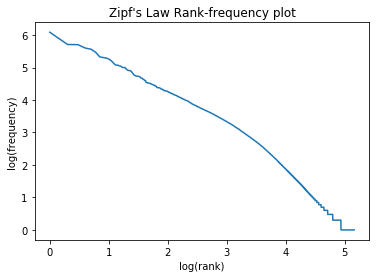

In [12]:
plt.plot(rank_log, freq_log)
plt.title("Zipf's Law Rank-frequency plot")
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')

#### 4. What are the twenty most common words?

In [13]:
most_common_20 = [word[0] for word in fdist.most_common(20)]
print('The twenty most common words are: {}'.format(most_common_20))

The twenty most common words are: ['THE', 'TO', 'OF', 'AND', 'IN', 'A', 'THAT', 'TAIWAN', "'S", 'SAID', 'FOR', 'ON', 'WILL', 'WITH', 'IS', '``', 'AT', 'AS', 'BY', 'HE']


#### 5. What happens to your type/token counts if you remove stopwords using nltk.corpora's stopwords list?

In [9]:
stop_words = set(stopwords.words('english'))
cleaned_corpus_tokens = [t for t in corpus_tokens if t.lower() not in stop_words]

In [10]:
distinct_words = set(cleaned_corpus_tokens)
distinct_words_num = len(distinct_words)
print('There are {} unique types in this corpus.'.format(distinct_words_num))

There are 143329 unique types in this corpus.


In [15]:
distinct_words_num = len(cleaned_corpus_tokens)
print('There are {} unique types in this corpus with stopwords removed.'.format(distinct_words_num))

There are 10514319 unique types in this corpus with stopwords removed.


#### 6. After removing stopwords, what are the 20 most common words?

In [16]:
cleaned_fdist = FreqDist(cleaned_corpus_tokens)

In [17]:
most_common_20 = [word[0] for word in cleaned_fdist.most_common(20)]
print('The twenty most common words are: {} with stopwords removed.'.format(most_common_20))

The twenty most common words are: ['TAIWAN', "'S", 'SAID', '``', "''", 'CHINA', 'PERCENT', 'GOVERNMENT', 'ALSO', 'CHEN', 'PRESIDENT', 'YEAR', 'TAIPEI', 'NT', 'TWO', 'MAINLAND', 'PEOPLE', 'US', 'NEW', 'CHINESE'] with stopwords removed.


#### Word association metrics

#### Recalling Emily Bender's sage advice- "Look at your data!"- examine the 30 highest-PMI word pairs, along with their unigram and bigram frequencies. What do you notice?

In [6]:
word_pair = [' '.join([pair[0], pair[1]]) for pair in bigrams(corpus_tokens)]
pair_fdist = FreqDist(word_pair)

In [7]:


pmi = {}
tokens_num = len(corpus_tokens)

for pair in word_pair:
    # Get the freq of the pair
    w1w2_freq = pair_fdist.get(pair)
    
    # Only consider bigrams that occur with frequency above that threshold
    if w1w2_freq :
        pair_split = pair.split(' ')
        
        # Get the freq of each of the words pair
        w1_freq = fdist.get(pair_split[0])
        w2_freq = fdist.get(pair_split[1])
        
        # Compute the unigram probabilities in the corpus
        p_w1 = w1_freq / tokens_num
        p_w2 = w2_freq / tokens_num
        
        # Compute the bigram probability
        p_w1w2 = w1w2_freq / w1_freq
    
        # PMI(w1,w2)=P(w1,w2)/P(w1)P(w2)
        pmi[pair] = np.log2(p_w1w2 / (p_w1 * p_w2))

In [8]:
pmi_sorted = sorted(pmi, key=pmi.get, reverse=True)
top_30 = pmi_sorted[:30]
print('The 30 highest-PMI word pairs are: {}.'.format(top_30))

The 30 highest-PMI word pairs are: ['HANNES FARLEITER', 'FREIE DEMOKRATISCHE', 'CEP006 10-03-97', 'NICOSIA GORGIE', 'GORGIE MURADOV', 'CAUSUS BELLI', 'HARDCOVER GILT-EDGED', 'FAYEZ ZAWARNEH', 'CEP002 10-07-97', 'NN1 NN2', 'TULAGA MANUELLA', 'LUCILLE ROYBAL-ALLARD', 'HALLDOR ASGRIMSSON', 'WAHYO DJATMIKO', 'FLAVONOID SPONIN', 'ZCCZ CEP007', 'CEP007 10-10-97', 'FRIEDRICH NAUMANN', 'ANDRIS AMERIKS', 'GERMANIC MANHOOD', 'ZAIMAN NURMATIAS', 'ESTRADE OYUELA', 'TOFILAU ETI', 'STEPAN KERKYASHARIAN', 'ARY MARDJONO', 'MESUT YILMAZ', 'SIX-CYLINDER 6.8-LITER', 'BACRE WALY', 'AFTERTAX WRITEDOWN', 'HISAO KANAMORI'].


In [11]:
count_unigram_top30 = top_30
#compute the frequency count
freq_unigram = collections.Counter(count_unigram_top30)
print('The 30 highest-PMI word pairs and their frequencies: {}.'.format(freq_unigram))

The 30 highest-PMI word pairs and their frequencies: Counter({'HANNES FARLEITER': 1, 'FREIE DEMOKRATISCHE': 1, 'CEP006 10-03-97': 1, 'NICOSIA GORGIE': 1, 'GORGIE MURADOV': 1, 'CAUSUS BELLI': 1, 'HARDCOVER GILT-EDGED': 1, 'FAYEZ ZAWARNEH': 1, 'CEP002 10-07-97': 1, 'NN1 NN2': 1, 'TULAGA MANUELLA': 1, 'LUCILLE ROYBAL-ALLARD': 1, 'HALLDOR ASGRIMSSON': 1, 'WAHYO DJATMIKO': 1, 'FLAVONOID SPONIN': 1, 'ZCCZ CEP007': 1, 'CEP007 10-10-97': 1, 'FRIEDRICH NAUMANN': 1, 'ANDRIS AMERIKS': 1, 'GERMANIC MANHOOD': 1, 'ZAIMAN NURMATIAS': 1, 'ESTRADE OYUELA': 1, 'TOFILAU ETI': 1, 'STEPAN KERKYASHARIAN': 1, 'ARY MARDJONO': 1, 'MESUT YILMAZ': 1, 'SIX-CYLINDER 6.8-LITER': 1, 'BACRE WALY': 1, 'AFTERTAX WRITEDOWN': 1, 'HISAO KANAMORI': 1}).


In [12]:
#get the bigrams
count_bigram = nltk.bigrams(top_30)
#compute the frequency count
freq_bigram = collections.Counter(count_bigram)
print('The 30 highest-PMI word pairs and their bigramfrequencies: {}.'.format(freq_bigram))

The 30 highest-PMI word pairs and their bigramfrequencies: Counter({('HANNES FARLEITER', 'FREIE DEMOKRATISCHE'): 1, ('FREIE DEMOKRATISCHE', 'CEP006 10-03-97'): 1, ('CEP006 10-03-97', 'NICOSIA GORGIE'): 1, ('NICOSIA GORGIE', 'GORGIE MURADOV'): 1, ('GORGIE MURADOV', 'CAUSUS BELLI'): 1, ('CAUSUS BELLI', 'HARDCOVER GILT-EDGED'): 1, ('HARDCOVER GILT-EDGED', 'FAYEZ ZAWARNEH'): 1, ('FAYEZ ZAWARNEH', 'CEP002 10-07-97'): 1, ('CEP002 10-07-97', 'NN1 NN2'): 1, ('NN1 NN2', 'TULAGA MANUELLA'): 1, ('TULAGA MANUELLA', 'LUCILLE ROYBAL-ALLARD'): 1, ('LUCILLE ROYBAL-ALLARD', 'HALLDOR ASGRIMSSON'): 1, ('HALLDOR ASGRIMSSON', 'WAHYO DJATMIKO'): 1, ('WAHYO DJATMIKO', 'FLAVONOID SPONIN'): 1, ('FLAVONOID SPONIN', 'ZCCZ CEP007'): 1, ('ZCCZ CEP007', 'CEP007 10-10-97'): 1, ('CEP007 10-10-97', 'FRIEDRICH NAUMANN'): 1, ('FRIEDRICH NAUMANN', 'ANDRIS AMERIKS'): 1, ('ANDRIS AMERIKS', 'GERMANIC MANHOOD'): 1, ('GERMANIC MANHOOD', 'ZAIMAN NURMATIAS'): 1, ('ZAIMAN NURMATIAS', 'ESTRADE OYUELA'): 1, ('ESTRADE OYUELA', 'TOF

#### Experiment with a few different threshold values, and report on what you observe

In [12]:
# Experiment with a few different threshold values, and report on what you observe.
pmi_threshold = 100
pmi = {}
tokens_num = len(corpus_tokens)

for pair in word_pair:
    # Get the freq of the pair
    w1w2_freq = pair_fdist.get(pair)
    
    # Only consider bigrams that occur with frequency above that threshold
    if w1w2_freq > pmi_threshold:
        pair_split = pair.split(' ')
        
        # Get the freq of each of the words pair
        w1_freq = fdist.get(pair_split[0])
        w2_freq = fdist.get(pair_split[1])
        
        # Compute the unigram probabilities in the corpus
        p_w1 = w1_freq / tokens_num
        p_w2 = w2_freq / tokens_num
        
        # Compute the bigram probability
        p_w1w2 = w1w2_freq / w1_freq
    
        # PMI(w1,w2)=P(w1,w2)/P(w1)P(w2)
        pmi[pair] = np.log2(p_w1w2 / (p_w1 * p_w2))

In [13]:
# effect of threshold on pmi
pmi

{'MAINLAND CHINESE': 15.181887038998138,
 'FOREIGN MINISTER': 15.97854370146625,
 'QIAN QICHEN': 32.07694156526419,
 'OF THE': 7.096688163156798,
 'THE CONTENT': 5.848686511868097,
 'CONTENT OF': 17.72626467042274,
 'THE NEWLY': 6.519682652531516,
 'GUIDELINES FOR': 18.052011768707725,
 'WHEN HE': 14.82797977884742,
 'HE MET': 12.23567901329909,
 'MONDAY IN': 10.71221400838967,
 'IN BEIJING': 7.829913768589968,
 'WITH REPRESENTATIVES': 10.074375117560562,
 'REPRESENTATIVES OF': 15.553916309449075,
 'OF JAPAN': 5.838641409823901,
 "JAPAN 'S": 14.127484762436874,
 'ALSO SAID': 11.309642841149184,
 'SAID THE': 7.843759963103037,
 'THE TIME': 4.555708391066538,
 'TIME IS': 11.528432598071637,
 'IS NOT': 11.372188988722597,
 'FOR A': 8.351183421068486,
 'BEIJING AND': 10.62636230838759,
 'AND TOKYO': 7.460951805275668,
 'ADDING THAT': 16.846522994165678,
 'THAT ``': 7.64411865662817,
 'WOULD BE': 15.119514048054548,
 'AT THE': 9.523036631992653,
 'THE PRESENT': 4.9680396734629495,
 "'S REMA

#### With a threshold of 100, what are the 10 highest-PMI word pairs?

In [14]:
pmi_sorted = sorted(pmi, key=pmi.get, reverse=True)
top_10 = pmi_sorted[:10]
print('The 10 highest-PMI word pairs are: {}.'.format(top_10))

The 10 highest-PMI word pairs are: ['SPONGIFORM ENCEPHALOPATHY', 'YING- JEOU', 'BOVINE SPONGIFORM', 'ALMA MATER', 'SRI LANKA', 'BARACK OBAMA', 'KUALA LUMPUR', 'SAO TOME', 'AU OPTRONICS', 'SYMPHONY ORCHESTRA'].


#### Examine the PMI for "New York". Explain in your own words why it is not higher.

In [15]:
ny_pmi = pmi['NEW YORK']
print('The PMI for "New York" is: {}.'.format(ny_pmi))

The PMI for "New York" is: 18.14142879368312.


In [18]:
fdist.get('NEW')

31251

In [19]:
fdist.get('YORK')

1949